In [5]:
%pip install yfinance

  Using cached multitasking-0.0.12-py3-none-any.whl
  Using cached frozendict-2.4.7-cp310-cp310-win_amd64.whl.metadata (24 kB)
  Using cached peewee-3.18.3-py3-none-any.whl
  Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl.metadata (13 kB)
  Using cached protobuf-6.33.2-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached websockets-15.0.1-cp310-cp310-win_amd64.whl.metadata (7.0 kB)
Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl (1.6 MB)
Using cached frozendict-2.4.7-cp310-cp310-win_amd64.whl (37 kB)
Using cached protobuf-6.33.2-cp310-abi3-win_amd64.whl (436 kB)
Using cached websockets-15.0.1-cp310-cp310-win_amd64.whl (176 kB)

   ----------- ---------------------------- 2/7 [websockets]
   ----------------- ---------------------- 3/7 [protobuf]
   ---------------------------------- ----- 6/7 [yfinance]
   ---------------------------------------- 7/7 [yfinance]

Note: you may need to restart the kernel to use updated packages.


--- 理想世界 (Normal Distribution) ---
Mean: -0.000021
Std (Vol): 0.010034
Skewness (偏度): 0.0020
Excess Kurtosis (超額峰度): 0.0271


--- 真實世界 (TSM) ---
Mean: 0.002281
Std (Vol): 0.022648
Skewness (偏度): 0.6523
Excess Kurtosis (超額峰度): 2.9376
⚠️ 警告: 肥尾效應 (Fat Tail)！極端事件發生機率遠高於常態分佈。




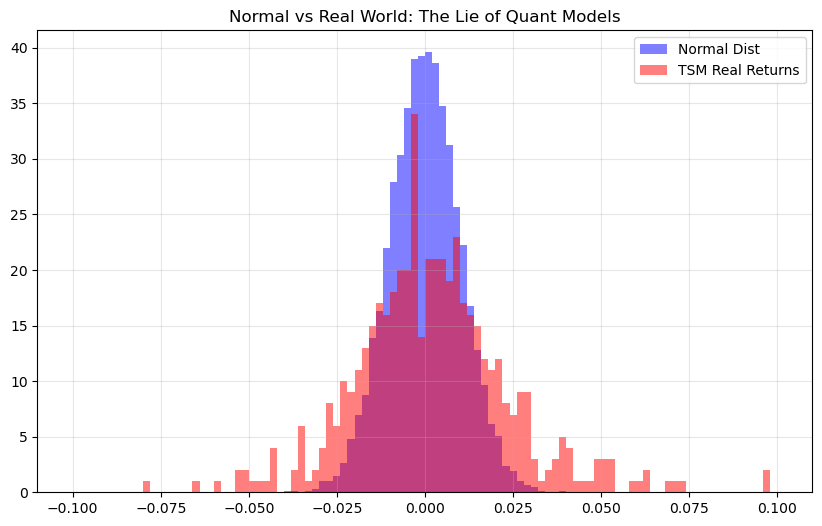

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. 製造完美的幻覺：常態分佈 (Normal Distribution)
np.random.seed(42)
# 生成 10,000 個點，平均 0，標準差 0.01 (模擬 1% 的日波動)
normal_returns = np.random.normal(0, 0.01, 10000)

# 2. 抓取殘酷的現實：台積電 (TSM) 過去兩年的日報酬
# 下載數據
ticker = "TSM"
data = yf.download(ticker, start="2023-01-01", end="2025-01-01", progress=False)

# 計算日報酬率 (Daily Return)
# pct_change() 是計算 (P_t - P_{t-1}) / P_{t-1}
real_returns = data['Close'].pct_change().dropna()

# 轉換成 numpy array 以便計算
real_returns_np = real_returns.values.flatten() # flatten 確保是一維陣列

# 3. 定義一個「驗屍官」函數：計算統計量
def print_stats(name, returns):
    # 使用 scipy 計算
    # bias=False 代表使用樣本統計量 (Sample Statistic) 而非母體
    skew = stats.skew(returns, bias=False)
    kurt = stats.kurtosis(returns, bias=False) # 這是 Excess Kurtosis (常態分佈為 0)
    
    print(f"--- {name} ---")
    print(f"Mean: {np.mean(returns):.6f}")
    print(f"Std (Vol): {np.std(returns):.6f}")
    print(f"Skewness (偏度): {skew:.4f}")
    print(f"Excess Kurtosis (超額峰度): {kurt:.4f}")
    
    # 嚴格檢查
    if kurt > 1.0:
        print("⚠️ 警告: 肥尾效應 (Fat Tail)！極端事件發生機率遠高於常態分佈。")
    print("\n")

# 4. 執行檢驗
print_stats("理想世界 (Normal Distribution)", normal_returns)
print_stats(f"真實世界 ({ticker})", real_returns_np)

# 5. 視覺化：眼見為憑
plt.figure(figsize=(10, 6))
# 畫常態分佈的直方圖 (透明度 0.5)
plt.hist(normal_returns, bins=100, alpha=0.5, label='Normal Dist', density=True, color='blue', range=(-0.1, 0.1))
# 畫真實報酬的直方圖
plt.hist(real_returns_np, bins=100, alpha=0.5, label=f'{ticker} Real Returns', density=True, color='red', range=(-0.1, 0.1))

plt.title("Normal vs Real World: The Lie of Quant Models")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()